In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread("../assets/imori.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bin_n = 9

In [4]:
def hog(img):
    #1. gx, gy 
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    #2. gx,gy --> mag, ang
    mag, ang = cv2.cartToPolar(gx,gy)
    
    #3. quantization 
    bins = np.int32(bin_n*ang/(2*np.pi))
    
    #4. divide to 8 sub-squares
    h, w = mag.shape
    
    N =8
    cell_N_H = h // N
    cell_N_W = w // N
    hist = np.zeros((cell_N_H, cell_N_W, bin_n), dtype= np.float32)
    
    for y in range(cell_N_H):
        for x in range(cell_N_W):
            for j in range(N):
                for i in range(N):
                    hist[y, x, bins[y * 4 + j, x * 4 + i]] += mag[y * 4 + j, x * 4 + i]
    
    Ch, Cw, _ = hist.shape
    epsilon = 1
    
    for y in range(Ch):
        for x in  range(Cw):
            hist[y, x] /= np.sqrt(np.sum(hist[max(y - 1, 0) : min(y + 2, Ch),
                                                                     max(x - 1, 0) : min(x + 2, Cw)] ** 2) + epsilon)
    return mag, ang, bins, hist

In [5]:
# draw HOG
def draw(gray, histogram, N=8):
        # get shape
        H, W = gray.shape
        cell_N_H, cell_N_W, _ = histogram.shape
        
        ## Draw
        out = gray[1 : H + 1, 1 : W + 1].copy().astype(np.uint8)

        for y in range(cell_N_H):
            for x in range(cell_N_W):
                cx = x * N + N // 2
                cy = y * N + N // 2
                x1 = cx + N // 2 - 1
                y1 = cy
                x2 = cx - N // 2 + 1
                y2 = cy
                
                h = histogram[y, x] / np.sum(histogram[y, x])
                h /= h.max()
        
                for c in range(9):
                    #angle = (20 * c + 10 - 90) / 180. * np.pi
                    # get angle
                    angle = (20 * c + 10) / 180. * np.pi
                    rx = int(np.sin(angle) * (x1 - cx) + np.cos(angle) * (y1 - cy) + cx)
                    ry = int(np.cos(angle) * (x1 - cx) - np.cos(angle) * (y1 - cy) + cy)
                    lx = int(np.sin(angle) * (x2 - cx) + np.cos(angle) * (y2 - cy) + cx)
                    ly = int(np.cos(angle) * (x2 - cx) - np.cos(angle) * (y2 - cy) + cy)

                    # color is HOG value
                    c = int(255. * h[c])

                    # draw line
                    cv2.line(out, (lx, ly), (rx, ry), (c, c, c), thickness=1)

        return out

In [9]:
magnitude, angle, bins, histogram = hog(gray)
# Write gradient magnitude to file
_magnitude = (magnitude / magnitude.max() * 255).astype(np.uint8)

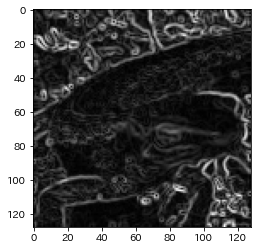

In [10]:
# Show Gradient 
plt.imshow(_magnitude, cmap = "gray")

In [11]:
# Write gradient angle to file
H, W, C = img.shape
out = np.zeros((H, W, 3), dtype=np.uint8)


# define color
# bins = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# angle = [0, 20,40,60,80,100,120,140,160,180]
# color = [Red, Green, Blue, Yellow, Fuchsia, Aqua, Olive, Purple, Teal]
C = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255], [0, 255, 255],
     [127, 127, 0], [127, 0, 127], [0, 127, 127]]

# draw color
for i in range(9):
     out[bins == i] = C[i]

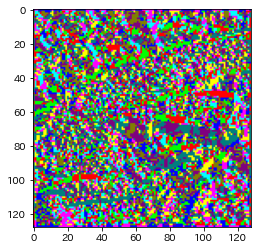

In [14]:
# Show Gradient angle
plt.imshow(out[:,:,::-1])

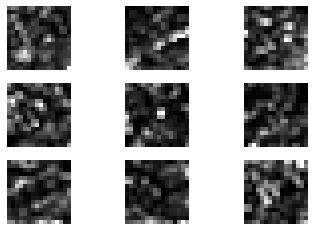

In [16]:
# write gradient histogram to file
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(histogram[..., i], cmap="gray")
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")
plt.show()

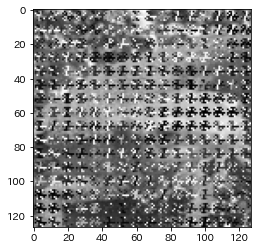

In [15]:
out = draw(gray, histogram)
plt.imshow(out, cmap="gray")